# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.166062e+01     7.430241e+00
 * time: 0.0016942024230957031
     1     2.949709e+01     4.755101e+00
 * time: 0.007825136184692383
     2     2.063048e+01     5.159166e+00
 * time: 0.01494908332824707
     3     1.511637e+01     5.106733e+00
 * time: 0.020112037658691406
     4     1.077463e+01     2.208148e+00
 * time: 0.025005102157592773
     5     1.004224e+01     2.349709e+00
 * time: 0.02936720848083496
     6     9.418380e+00     1.296092e+00
 * time: 0.03360319137573242
     7     8.958396e+00     1.135764e+00
 * time: 0.03786015510559082
     8     8.644471e+00     1.169177e+00
 * time: 0.042475223541259766
     9     8.443121e+00     8.575891e-01
 * time: 0.04747200012207031
    10     8.283617e+00     8.014223e-01
 * time: 0.052555084228515625
    11     8.158667e+00     6.460159e-01
 * time: 0.05789923667907715
    12     8.088775e+00     4.187340e-01
 * time: 0.06308412551879883
    13     8.057385e+00     6.024229e-01
 

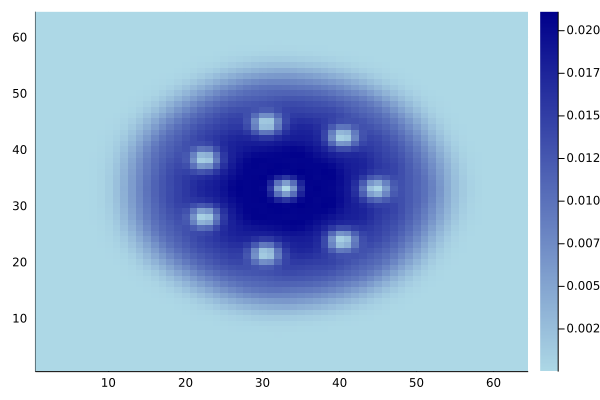

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)